In [11]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Week 7

## Support Vector Machines

One more algorithm that's very powerful.  Compared to logistic regression and neural networks, SVM sometimes does better.  This will be the last supervised algorithm that we spend a lot of time on.

### Alternative view of logistic regression

Start with logistic regression and show how we can modify it a bit to essentially get an SVM.

Logistic regression:

$$ h_{\theta}(x) = \frac{1}{1+e^{-\theta^Tx}}$$

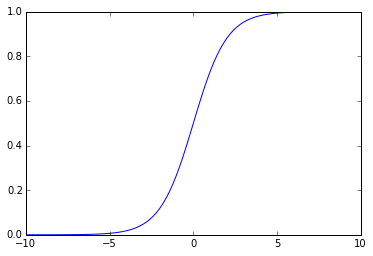

In [12]:
# This is just a plot of the sigmoid function

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

Use

$$z = \theta^Tx$$

So that

$$h_{\theta}(x) = g(z) $$

If $y=1$, we want $h_{\theta}(x) \approx 1$, $\theta^T x \gg 0$

If $y=0$, we want $h_{\theta}(x) \approx 0$, $\theta^T x \ll 0$

Cost of example:

$$-(y \log  h_{\theta} (x) + (1 - y) \log (1-h_{\theta}(x)))$$

$$-(y \log  \frac{1}{1+e^{-\theta^Tx}}+ (1 - y) \log (1-\frac{1}{1+e^{-\theta^Tx}}(x)))$$

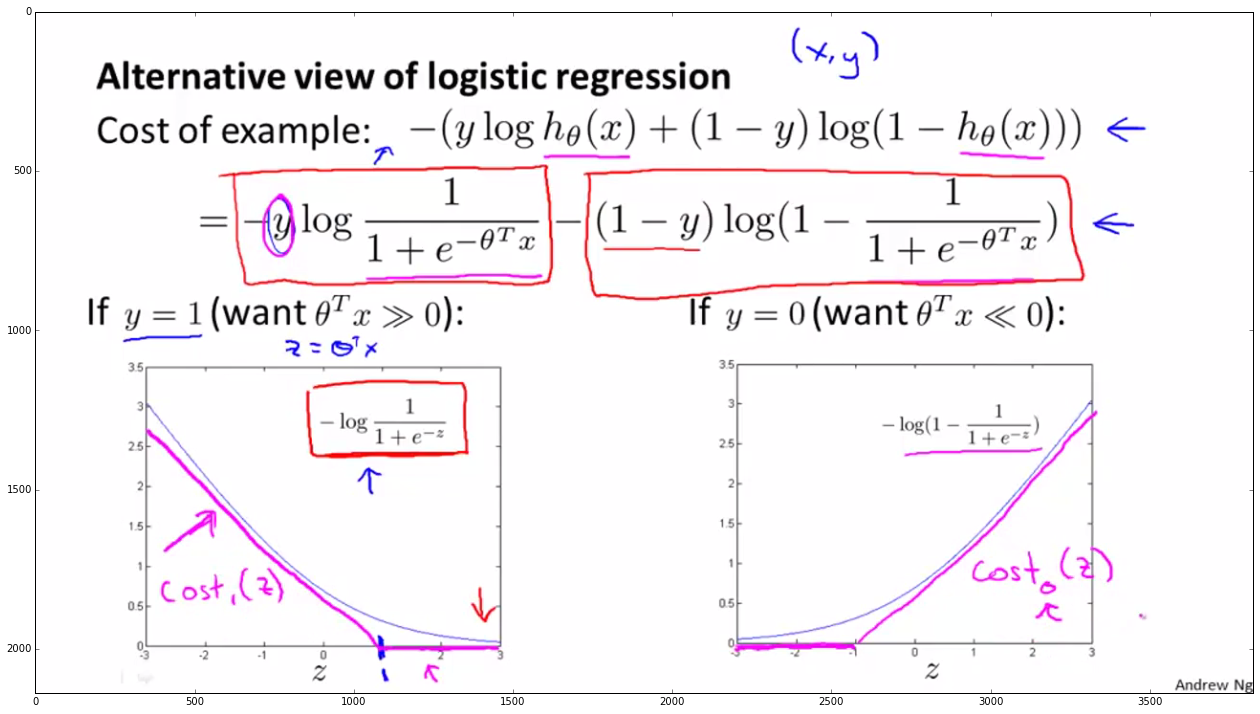

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.misc import imread, imresize

img = imread('./assets/altview.png')
fig0, ax0 = plt.subplots(figsize=(18,10))
ax0.imshow(img)
plt.tight_layout()

## Support vector machine

Replace the logistic curves with a 2-piece line segment, one $\text{cost}_1(\theta^T x^{(i)})$, one $\text{cost}_0(\theta^T x^{(i)})$

### SVM hypothesis

Outputs only 1 or 0.

$$\underset {min} {\theta} C \sum_{i=1}^m \big[ y^{(i)} cost_1(\theta^T x^{(i)}) + (1 - y^{(i)} cost_0(\theta^T x^{(i)}) \big]  + \frac{1}{2} \sum_{i=1}^n \theta_j^2 $$

$$h_{\theta}(x)  = 1 if \theta^T x \geq 0,  or 0 otherwise$$

## Large Margin Classification

Sometimes people talk about SVMs as large margin classifiers.



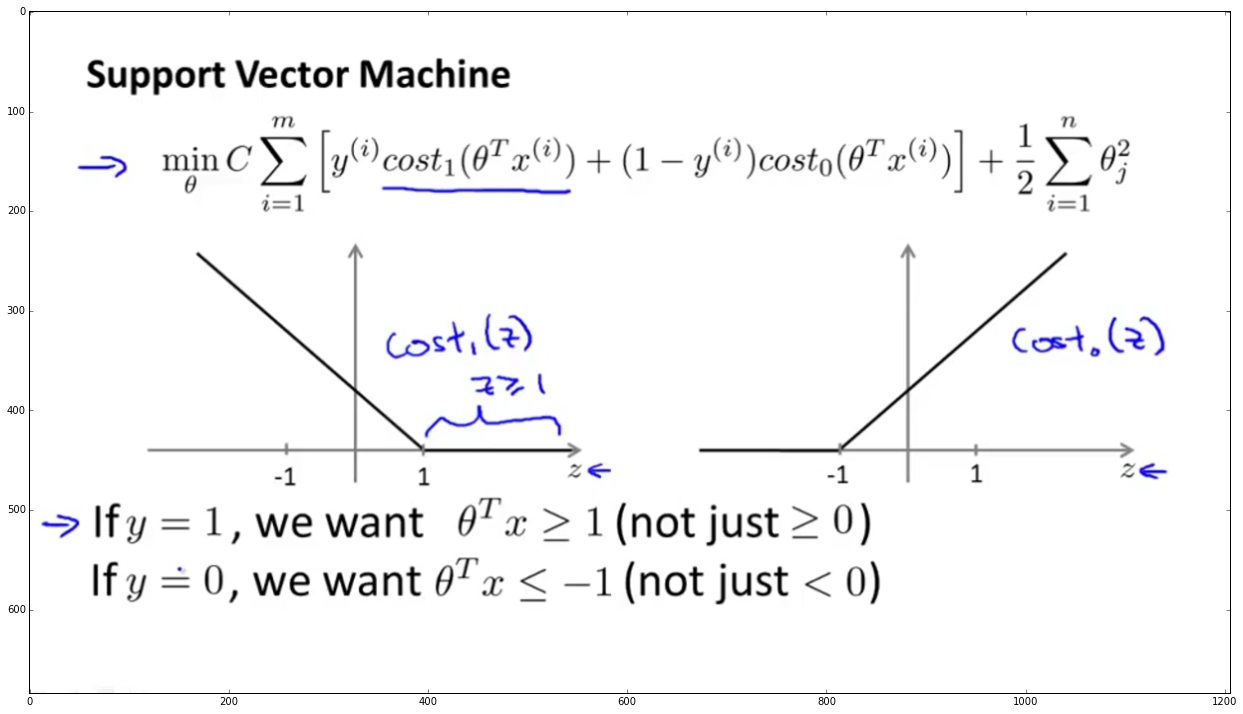

In [14]:
img = imread('./assets/SVM.png')
fig0, ax0 = plt.subplots(figsize=(18,10))
ax0.imshow(img)
plt.tight_layout()

Let's set $C = 100,000$

If C is very large, then we'll be highly motivated to choose the first term to be 0.


$$\underset {min} {\theta} C \sum_{i=1}^m \big[ y^{(i)} cost_1(\theta^T x^{(i)}) + (1 - y^{(i)} cost_0(\theta^T x^{(i)}) \big]  + \frac{1}{2} \sum_{i=1}^n \theta_j^2 $$

Whenever $y^{(i)} = 1$: $\theta^T x^{(i)} \geq 1$ 

Whenever $y^{(i)} = 0$: $\theta^T x^{(i)} \leq -1$ 

#### SVM Decision Boundary: linearly separable case

SVM decision boundary has a largin margin between the data.

This distance is called the margin.

#### Large margin classifier in presence of outliers

Large margin classifiers can be sensitive to outliers.

SVMs are large margin classifiers only when C is very large.

## Mathematics behind large margin classification

Vector inner product

$$ u = 
\begin{bmatrix}
u_1\cr
u_2
\end{bmatrix}  \ \ \ \ \  v = 
\begin{bmatrix}
v_1\cr
v_2
\end{bmatrix}$$

$u^T v = ? $

$||u|| = $ length of vector $u$

$= \sqrt{u_1^2 +u_2^2}$

### SVM Decision Boundary

We have

$$\underset {min}{\theta} \frac{1}{2} \sum_{j=1}^n \theta_j^2 = \frac{1}{2} ||\theta||^2$$

$$s.t.  \ \ \ \ p^{(i)} \dot ||\theta|| \geq 1 \ \ \ if y^{(i)} = 1$$

$$s.t.  \ \ \ \ p^{(i)} \dot ||\theta|| \leq 1 \ \ \ if y^{(i)} = 0$$

## Kernels I

### Non-linear Decision Boundary

Can invent very complicated polynomial decision boundaries.

Is there a different / better choice of features $f_1, f_2, f_3$?

### Kernel

Given $x$, compute new feature depending on proximity ot landmarks $l^{(1)}, l^{(2)}, l^{(3)}$

Given $x$:  $ \ \ \ f_1 = \text{similarity}(x,l^{(1)}) = \exp( - \frac{||x - l^{(1)} ||^2}{2 \sigma^2})$

These similarity functions are kernels

### Kernels and Similarity

$f_1 = similarity(x,l^{(1)}) = \exp( - \frac{||x - l^{(1)} ||^2}{2 \sigma^2})$

If $x \approx l^{(1)}$:

$$f_1 = \exp( - \frac{0^2}{2 \sigma^2}) \approx 1$$


If $x$ is far from $l^{(1)}$:

$$f_1 = \exp( - \frac{(\text{large number})^2}{2 \sigma^2}) \approx 0$$

## Kernels II

### Choosing the landmarks

Where did we get out landmarks form?

We're going to take these examples, and put landmarks in exactly the same location as the training examples.

My features are going ot measure how close something is to an example in the training set.

### SVM with Kernels

Given $(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)}), $

choose $l^{(1)} = x^{(1)},l^{(2)} = x^{(2)},...l^{(m)} = x^{(m)}$

Given example $x$:

$$f_1 = \text{similarity}(x,l^{(1)})$$
$$f_2 = \text{similarity}(x,l^{(2)})$$


$$f = 
\begin{bmatrix}
f_0\cr
f_1\cr
f_2\cr
.\cr
.\cr
f_m
\end{bmatrix}$$ with $f_0 = 1$

### SVM parameters

C($=\frac{1}{\lambda}$).

large C: lower bias, high variance

small C: higher bias, low variance

$$\sigma^2$$ large $\sigma^2$: features f_i vary more smoothly.


small $\sigma^2$: features f_i vary less smoothly.


## Using an SVM

So far have been talking about SVMs in the abstract.  How about actually using an SVM?

Use SVM software package (e.g. liblinear, libsvm, ...) to solve for parameters $\theta$.

Need to specify:
- Choice of parameter C.
- Choice of kernel (similarity function):

E.g. No kernel ("linear kernel")
- Predict "$y=1"$ if $\theta^Tx \geq 0$

Gaussian kernel

### Kernel (similarity) functions:

```
function f = kernel(x1, x2)
    
    f = exp(norm(x1-x2)^2/(2*sigma^2))
    
return
```

Note: do perform feature scaling before using the Gaussian kernel

### Other choices of kernel

Note: not all similarity functions $\text{similarity}(x,l)$ make valid kernels.

Need to satisfy technical condition called "Mercer's Theorem" to make sure SVM packages' optimizations run correctly, and do not diverge.


Many off-the-shelf kernels available:
- Polynomial kernel: $k(x,l)$

### Multi-class classification

Many SVM packages already have built-in multi-class classification functionality

Otherwise, use one-vs.-all method (Train $K$ SVMs...)

### Logistic regression vs. SVMs

When should we use one algorithm vs the other?

If $n$ = number of features, $m$ = number of training examples

If $n$ is large realtive to m:
- use logistic regression

If $n$ is small, $m$ is intermediate:
- Use SVM with Gaussian kernel

If $n$ is small, $m$ is large 
- Create / add more features, then use logistic regression or SVM without a kernel

Neural network likely to work well for most of these settings, but may be slower ot train



With logistic regression, neural networks, and SVM you're now positioned to build state of the art maching learning systems